### **Forecast Weather Using ARIMA**
**Goal:** Predict future daily temperatures using an ARIMA model based on past weather data

In [ ]:
!pip install numpy==1.23.5  # Compatible numpy version for pmdarima
!pip install pmdarima --no-cache-dir

**Install Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

**Load or Simulate Weather Data**

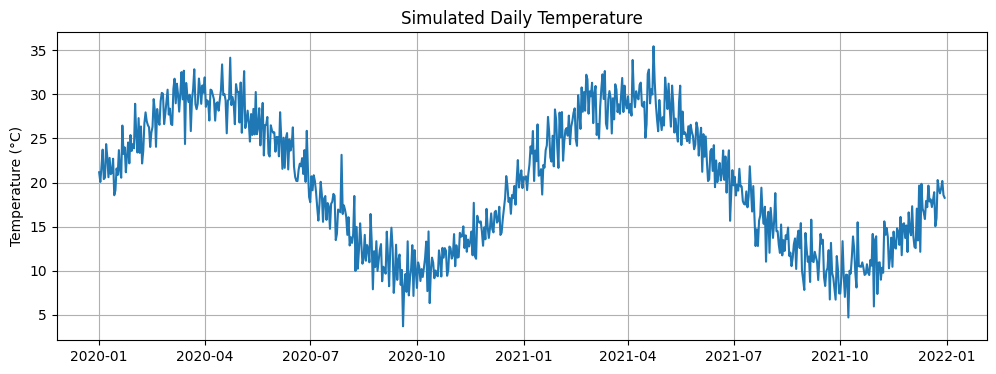

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate 2 years of daily temperature data (cyclical + noise)
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=730, freq='D')
temps = 20 + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 2, len(dates))
df = pd.DataFrame({'date': dates, 'temp': temps})
df.set_index('date', inplace=True)

# Visualize the temperature trend
plt.figure(figsize=(12, 4))
plt.plot(df['temp'])
plt.title("Simulated Daily Temperature")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


**Check for Stationarity (ADF Test)**

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['temp'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.5499271292302823
p-value: 0.5086845957988226


**Split into Train and Test Sets**

In [ ]:
# Use last 90 days
recent_data = df['temp'][-90:]

# Train: first 83 days | Test: last 7 days
train = recent_data[:-7]
test = recent_data[-7:]

**Fit ARIMA Model with Auto-ARIMA**

In [ ]:
# Fit ARIMA model
model = auto_arima(
    train,
    seasonal=True,
    m=7,                  # Weekly seasonality
    start_p=1, start_q=1,
    max_p=2, max_q=2,
    max_P=1, max_Q=1,
    d=None,
    D=1,
    stepwise=True,
    suppress_warnings=True,
    trace=True,
    error_action='ignore'
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=391.025, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=375.816, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=393.545, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=390.648, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=1.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=376.192, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=377.763, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=377.796, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=376.068, Time=0.21 sec
 ARIMA(2,0,1)(1,1,0)[7] intercept   : AIC=379.446, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[7]             : AIC=386.707, Time=0.05 sec

Best model:  ARIMA(1,0,0)(1,1,0)[7] intercept
Total fit time: 4.876 seconds


**Forecast Future Temperatures**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


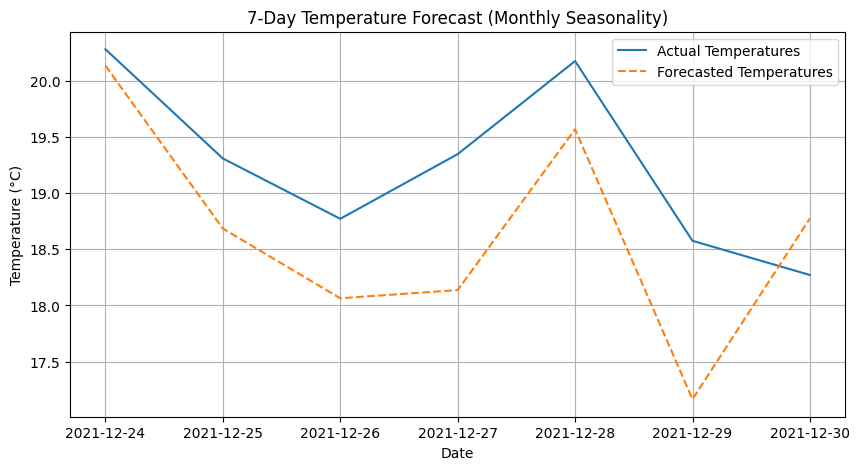

In [ ]:
# Forecast next 7 days
forecast = model.predict(n_periods=7)

# Create forecast index to match test set
forecast_index = test.index

#plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, test.values, label='Actual Temperatures')
plt.plot(test.index, forecast, label='Forecasted Temperatures', linestyle='--')
plt.title("7-Day Temperature Forecast (Monthly Seasonality)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.71
Mean Absolute Error: 0.75


**📘 Summary**
This project uses the ARIMA time series model to forecast daily temperatures
over a 7-day horizon.

*   Dataset: Simulated 2 years (730 days) of daily temperatures with yearly sinusoidal seasonality and noise.
*   Model: auto_arima() with weekly (m=7) and monthly (m=30) seasonality settings.
*   Forecast: Trained on past data to predict the last 7 days.
*   Evaluation: Assessed using MSE and MAE, and visualized forecast vs actual.
*   Insight: ARIMA works better with longer training data but may struggle with highly non-linear seasonal patterns.